The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [7]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

# Start coding here!

In [8]:
df = pd.read_csv('data/nobel.csv')

In [9]:
print(df.head())
print(df.columns)

   year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]
Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


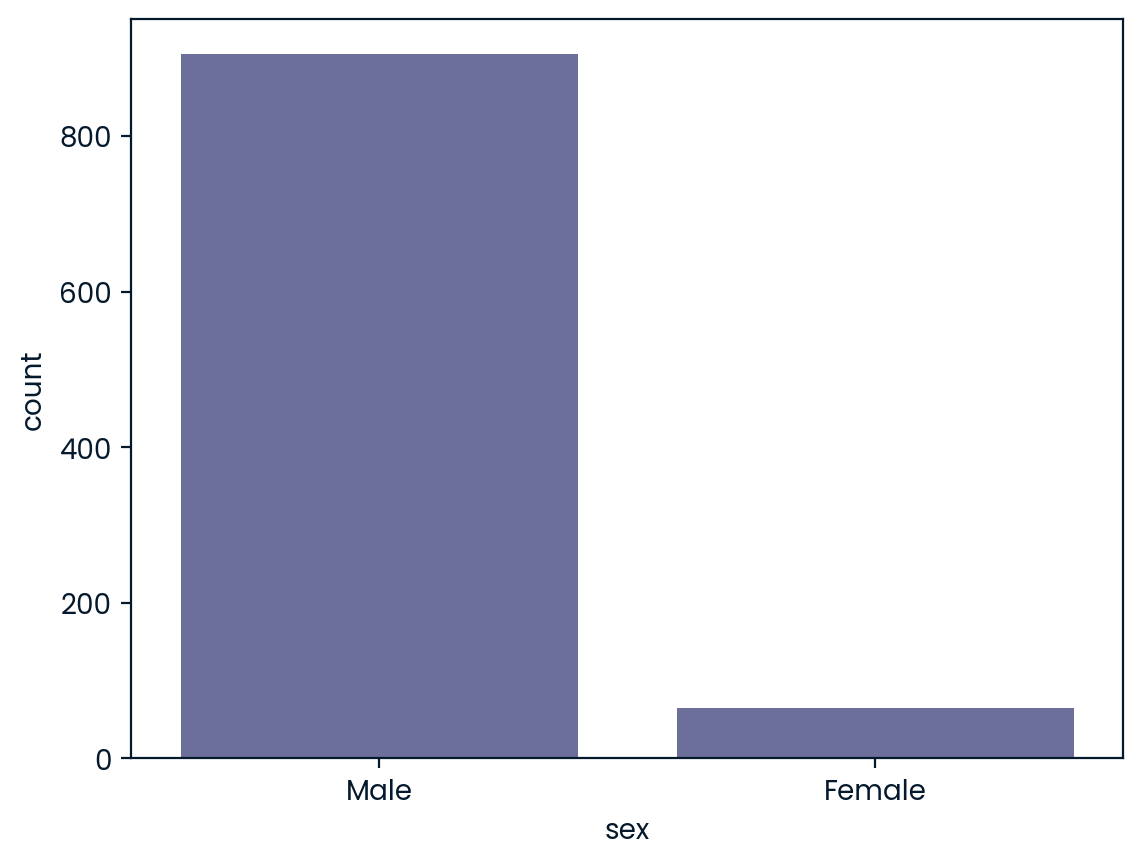

In [10]:
sns.countplot(data=df, x='sex')
top_gender = 'Male'

In [11]:
top_country = df['birth_country'].value_counts().index[0]
print(top_country)





United States of America


    decade         year  laureate_id   USAFlag
10    2000  2004.373984   784.471545  0.422764
9     1990  1994.644231   439.798077  0.403846
12    2020  2021.480000  1004.160000  0.360000
8     1980  1984.546392   389.298969  0.319588
7     1970  1974.711538   391.990385  0.317308
11    2010  2014.619835   915.272727  0.314050
4     1940  1946.069767   330.534884  0.302326
5     1950  1954.541667   312.625000  0.291667
6     1960  1964.683544   343.227848  0.265823
3     1930  1934.571429   312.946429  0.250000
1     1910  1913.775000   296.800000  0.075000
2     1920  1924.703704   314.611111  0.074074
0     1900  1905.035088   301.087719  0.017544
2000


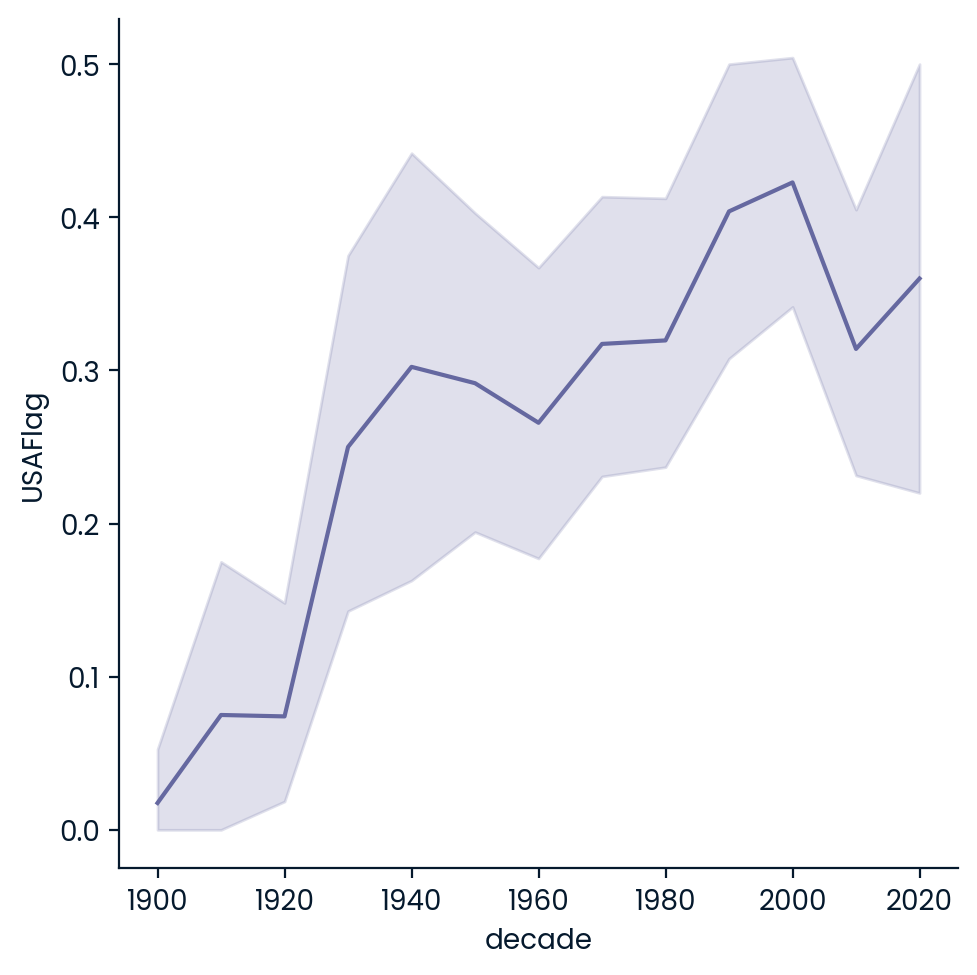

In [12]:
df['USAFlag'] = df['birth_country'] == 'United States of America'
df['decade'] = np.floor(df['year'] / 10) * 10
df['decade']=df['decade'].astype(int)
decade_usa = df.groupby('decade', as_index=False).mean('USAFlag').sort_values('USAFlag', ascending=False)
print(decade_usa)
max_decade_usa = decade_usa['decade'].values[0]
print(max_decade_usa)
sns.relplot(data=df,kind='line', x='decade', y='USAFlag')

    decade    category         year  laureate_id   USAFlag   sexflag
68    2020  Literature  2021.500000  1011.500000  0.250000  0.500000
64    2010       Peace  2014.214286   913.357143  0.000000  0.357143
50    1990  Literature  1994.500000   671.500000  0.100000  0.300000
56    2000  Literature  2004.500000   788.900000  0.000000  0.300000
66    2020   Chemistry  2021.700000   985.200000  0.400000  0.300000
..     ...         ...          ...          ...       ...       ...
34    1960       Peace  1963.888889   484.777778  0.222222  0.000000
37    1970   Economics  1974.800000   686.000000  0.333333  0.000000
38    1970  Literature  1974.454545   649.818182  0.000000  0.000000
41    1970     Physics  1974.920000   101.880000  0.480000  0.000000
36    1970   Chemistry  1974.400000   246.000000  0.333333  0.000000

[72 rows x 6 columns]
{2020: 'Literature'}


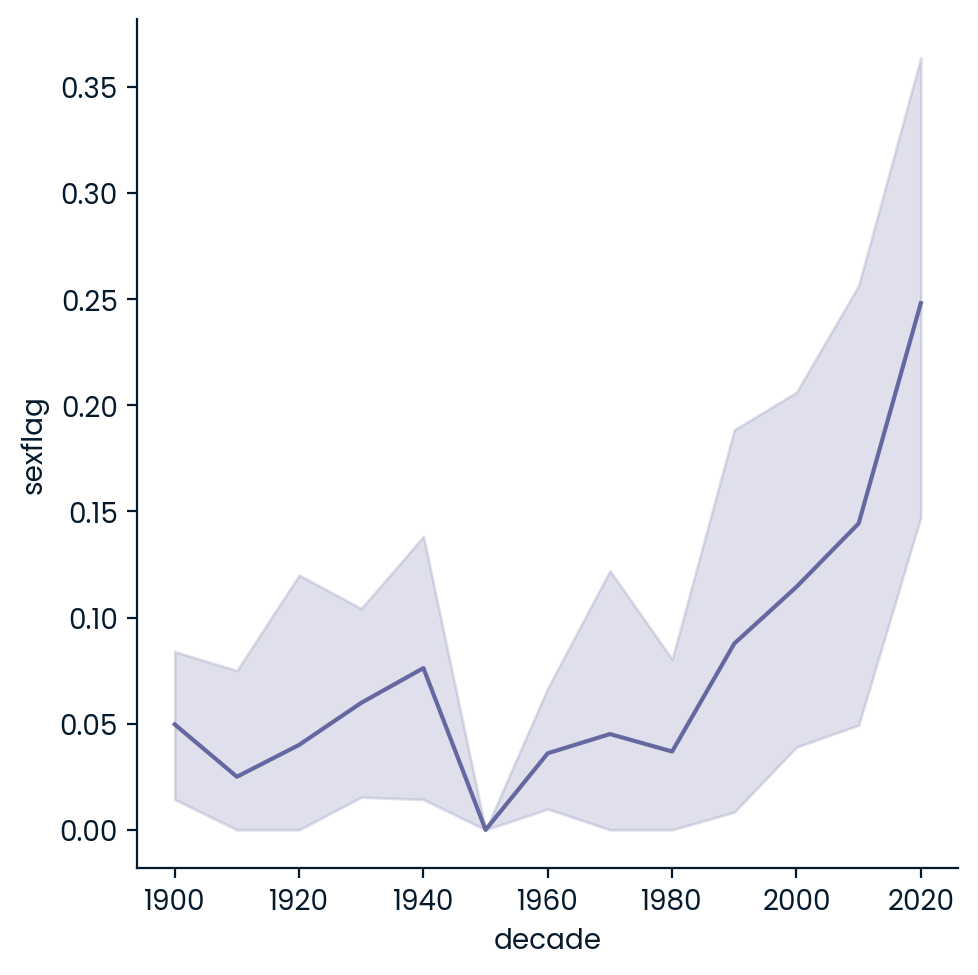

In [13]:
df['sexflag']=df['sex'] == 'Female'
max_female = df.groupby(['decade','category'], as_index=False).mean('sexflag').sort_values('sexflag', ascending=False)
max_female_dict={max_female['decade'].values[0]: max_female['category'].values[0]}
print(max_female)
print(max_female_dict)
sns.relplot(data=max_female, kind='line', x='decade', y='sexflag')




In [14]:
new_df=df[df['sex'] == 'Female']
print(new_df)
first_woman_name = new_df['full_name'].iloc[0]
first_woman_category = new_df['category'].iloc[0]
print(first_woman_name)
print(first_woman_category)

     year    category  ... decade sexflag
19   1903     Physics  ...   1900    True
29   1905       Peace  ...   1900    True
51   1909  Literature  ...   1900    True
62   1911   Chemistry  ...   1910    True
128  1926  Literature  ...   1920    True
..    ...         ...  ...    ...     ...
982  2022  Literature  ...   2020    True
989  2023    Medicine  ...   2020    True
993  2023     Physics  ...   2020    True
998  2023       Peace  ...   2020    True
999  2023   Economics  ...   2020    True

[65 rows x 21 columns]
Marie Curie, née Sklodowska
Physics


In [15]:
names_count = df.value_counts('full_name')
print(names_count)
print(type(names_count))
repeat_list = list(names_count[names_count > 1].index)
print(repeat_list)

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
                                                                                    ..
Gertrude B. Elion                                                                    1
Gerty Theresa Cori, née Radnitz                                                      1
Giorgio Parisi                                                                       1
Giorgos Seferis                                                                      1
Élie Ducommun                                                                        1
Length: 993, dtype: int64
<class 